References:

Format numbers in pandas as currency in thousands or millions. (n.d.). Stack Overflow. https://stackoverflow.com/questions/41271673/format-numbers-in-pandas-as-currency-in-thousands-or-millions

Pandas Fiscal Year – Get Financial Year with Pandas. (2021, January 21). https://datagy.io/pandas-fiscal-year/.https://www.statology.org/pandas-group-by-quarter/

Usaspending-api/usaspending_api/api_contracts/search_filters.md at master · fedspendingtransparency/usaspending-api. (n.d.). GitHub. https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period


In [214]:
# Dependencies and Setup
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import scipy.stats as st
import io
import numpy as np
from datetime import date
import matplotlib.ticker as ticker


Paginated API identified (results were divided into small datasets or pages due to size). The API limit parameter was set to 100 rows per page. As such, data rows for the merged dataframe were derived from the first paginated dataset of each quarter in the designated fiscal year to capture a sample spread of the overall dataset. 

In [215]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2019-10-01",
						"end_date":"2020-12-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY20Q1_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY20
print(f"Number of rows in the DataFrame: {len(FY20Q1_df)}")
FY20Q1_df['Start Date'] = pd.to_datetime(FY20Q1_df['Start Date'])
FY20Q1_df['As Quarter'] = FY20Q1_df['Start Date'].dt.to_period('Q-SEP')
FY20Q1_df['Fiscal Year'] =FY20Q1_df['As Quarter'].dt.qyear
FY20Q1_df = FY20Q1_df[FY20Q1_df['Award Amount'] > 0]
FY20Q1_df = FY20Q1_df[FY20Q1_df['Fiscal Year'] == 2020]
# Display the data table for preview
FY20Q1_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
36,116287234,SPE2DP20V1199,PACIFIC STAR CORPORATION,2020-09-16,2020-10-14,14.34,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507655508!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V1199_9700_-NONE-_-NONE-,2020Q4,2020
37,111967827,SPE2DP20V1075,PACIFIC STAR CORPORATION,2020-08-20,2020-09-17,369.50,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,"8507601396!APPLICATOR,SILVER N",1173,department-of-defense,CONT_AWD_SPE2DP20V1075_9700_-NONE-_-NONE-,2020Q4,2020
39,111302926,SPE2DP20V0957,PACIFIC STAR CORPORATION,2020-07-24,2020-08-21,9.90,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507548108!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0957_9700_-NONE-_-NONE-,2020Q4,2020
40,110741150,SPE2DP20V0834,PACIFIC STAR CORPORATION,2020-06-29,2020-07-27,164.40,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507500924!SALINE FOR OPHTHALM,1173,department-of-defense,CONT_AWD_SPE2DP20V0834_9700_-NONE-_-NONE-,2020Q3,2020
41,110123519,SPE2DP20V0755,PACIFIC STAR CORPORATION,2020-06-10,2020-07-08,8.65,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507451750!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0755_9700_-NONE-_-NONE-,2020Q3,2020


In [216]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2020-01-01",
						"end_date":"2020-03-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY20Q2_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY20
print(f"Number of rows in the DataFrame: {len(FY20Q2_df)}")
FY20Q2_df['Start Date'] = pd.to_datetime(FY20Q2_df['Start Date'])
FY20Q2_df['As Quarter'] = FY20Q2_df['Start Date'].dt.to_period('Q-SEP')
FY20Q2_df['Fiscal Year'] =FY20Q2_df['As Quarter'].dt.qyear
FY20Q2_df = FY20Q2_df[FY20Q2_df['Award Amount'] > 0]
FY20Q2_df = FY20Q2_df[FY20Q2_df['Fiscal Year'] == 2020]
# Display the data table for preview
FY20Q2_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
5,98046227,SPE2DP20V0421,PACIFIC STAR CORPORATION,2020-03-18,2020-04-08,17.52,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507254373!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0421_9700_-NONE-_-NONE-,2020Q2,2020
6,98003129,SPE2DP20V0399,PACIFIC STAR CORPORATION,2020-03-16,2020-04-06,9.04,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507246914!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0399_9700_-NONE-_-NONE-,2020Q2,2020
7,98302611,SPE2DP20F3757,"KAPLAN INDUSTRIES, INC.",2020-03-26,2020-07-24,105120.00,None,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,...,None,None,None,OH,"8507276502!OXYGEN,TECHNICAL",1173,department-of-defense,CONT_AWD_SPE2DP20F3757_9700_SPE2DP16D0001_9700,2020Q2,2020
8,98273464,SPE2DP20F3740,"KAPLAN INDUSTRIES, INC.",2020-03-25,2020-07-23,256000.00,None,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,...,None,None,None,OH,"8507272834!OXYGEN,TECHNICAL",1173,department-of-defense,CONT_AWD_SPE2DP20F3740_9700_SPE2DP16D0001_9700,2020Q2,2020
9,94051673,SPE2DP20F0262,"KAPLAN INDUSTRIES, INC.",2019-10-16,2020-06-15,14320.00,None,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,...,None,None,None,OH,"8506909656!NITROUS OXIDE,USP",1173,department-of-defense,CONT_AWD_SPE2DP20F0262_9700_SPE2DP16D0001_9700,2020Q1,2020


In [217]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2020-04-01",
						"end_date":"2020-06-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
        "fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY20Q3_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY20
print(f"Number of rows in the DataFrame: {len(FY20Q3_df)}")
FY20Q3_df['Start Date'] = pd.to_datetime(FY20Q3_df['Start Date'])
FY20Q3_df['As Quarter'] = FY20Q3_df['Start Date'].dt.to_period('Q-SEP')
FY20Q3_df['Fiscal Year'] =FY20Q3_df['As Quarter'].dt.qyear
FY20Q3_df = FY20Q3_df[FY20Q3_df['Award Amount'] > 0]
FY20Q3_df = FY20Q3_df[FY20Q3_df['Fiscal Year'] == 2020]
# Display the data table for preview
FY20Q3_df.head(5)


Number of rows in the DataFrame: 82


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
4,110741150,SPE2DP20V0834,PACIFIC STAR CORPORATION,2020-06-29,2020-07-27,164.40,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507500924!SALINE FOR OPHTHALM,1173,department-of-defense,CONT_AWD_SPE2DP20V0834_9700_-NONE-_-NONE-,2020Q3,2020
5,110123519,SPE2DP20V0755,PACIFIC STAR CORPORATION,2020-06-10,2020-07-08,8.65,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507451750!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0755_9700_-NONE-_-NONE-,2020Q3,2020
6,99175196,SPE2DP20V0563,PACIFIC STAR CORPORATION,2020-04-20,2020-05-18,6.71,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,TX,8507331264!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0563_9700_-NONE-_-NONE-,2020Q3,2020
7,101899587,SPE2DP20F4364,"KAPLAN INDUSTRIES, INC.",2020-04-22,2020-08-20,65880.00,None,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,...,None,None,None,OH,"8507336543!NITROUS OXIDE,USP",1173,department-of-defense,CONT_AWD_SPE2DP20F4364_9700_SPE2DP16D0001_9700,2020Q3,2020
8,101899586,SPE2DP20F4363,"KAPLAN INDUSTRIES, INC.",2020-04-22,2020-08-20,102200.00,None,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,...,None,None,None,OH,"8507336449!OXYGEN,TECHNICAL",1173,department-of-defense,CONT_AWD_SPE2DP20F4363_9700_SPE2DP16D0001_9700,2020Q3,2020


In [218]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2020-07-01",
						"end_date":"2020-09-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY20Q4_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY20
print(f"Number of rows in the DataFrame: {len(FY20Q4_df)}")
FY20Q4_df['Start Date'] = pd.to_datetime(FY20Q4_df['Start Date'])
FY20Q4_df['As Quarter'] = FY20Q4_df['Start Date'].dt.to_period('Q-SEP')
FY20Q4_df['Fiscal Year'] =FY20Q4_df['As Quarter'].dt.qyear
FY20Q4_df = FY20Q4_df[FY20Q4_df['Award Amount'] > 0]
FY20Q4_df = FY20Q4_df[FY20Q4_df['Fiscal Year'] == 2020]
# Display the data table for preview
FY20Q4_df.head(5)


Number of rows in the DataFrame: 92


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Awarding Agency,Awarding Sub Agency,Contract Award Type,Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
4,116287234,SPE2DP20V1199,PACIFIC STAR CORPORATION,2020-09-16,2020-10-14,14.34,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,TX,8507655508!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V1199_9700_-NONE-_-NONE-,2020Q4,2020
5,111967827,SPE2DP20V1075,PACIFIC STAR CORPORATION,2020-08-20,2020-09-17,369.50,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,TX,"8507601396!APPLICATOR,SILVER N",1173,department-of-defense,CONT_AWD_SPE2DP20V1075_9700_-NONE-_-NONE-,2020Q4,2020
7,111302926,SPE2DP20V0957,PACIFIC STAR CORPORATION,2020-07-24,2020-08-21,9.90,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,TX,8507548108!HYDROGEN PEROXIDE T,1173,department-of-defense,CONT_AWD_SPE2DP20V0957_9700_-NONE-_-NONE-,2020Q4,2020
8,116498540,SPE2DP20F7309,"KAPLAN INDUSTRIES, INC.",2020-09-23,2021-01-21,256000.00,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,None,...,NaN,NaN,None,OH,"8507675263!OXYGEN,TECHNICAL",1173,department-of-defense,CONT_AWD_SPE2DP20F7309_9700_SPE2DP16D0001_9700,2020Q4,2020
9,116140093,SPE2DP20F7048,"KAPLAN INDUSTRIES, INC.",2020-09-09,2021-01-07,61320.00,Department of Defense,Defense Logistics Agency,DELIVERY ORDER,None,...,NaN,NaN,None,OH,"8507637081!OXYGEN,TECHNICAL",1173,department-of-defense,CONT_AWD_SPE2DP20F7048_9700_SPE2DP16D0001_9700,2020Q4,2020


In [219]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2020-10-01",
						"end_date":"2021-12-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY21Q1_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY21
print(f"Number of rows in the DataFrame: {len(FY21Q1_df)}")
FY21Q1_df['Start Date'] = pd.to_datetime(FY21Q1_df['Start Date'])
FY21Q1_df['As Quarter'] = FY21Q1_df['Start Date'].dt.to_period('Q-SEP')
FY21Q1_df['Fiscal Year'] =FY21Q1_df['As Quarter'].dt.qyear
FY21Q1_df = FY21Q1_df[FY21Q1_df['Award Amount'] > 0]
FY21Q1_df = FY21Q1_df[FY21Q1_df['Fiscal Year'] == 2021]
# Display the data table for preview
FY21Q1_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Awarding Agency,Awarding Sub Agency,Contract Award Type,Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
20,144948149,SPE2DP21V1581,MIDWEST PHARMACEUTICALS INC,2021-09-29,2021-10-14,1236.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508572106!METHYLPREDNISOLONE,1173,department-of-defense,CONT_AWD_SPE2DP21V1581_9700_-NONE-_-NONE-,2021Q4,2021
21,144745050,SPE2DP21V1554,MIDWEST PHARMACEUTICALS INC,2021-09-23,2021-10-08,199.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508552471!DEXTROSE AND SODIUM,1173,department-of-defense,CONT_AWD_SPE2DP21V1554_9700_-NONE-_-NONE-,2021Q4,2021
23,144623967,SPE2DP21V1537,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,10.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,"8508543366!ALUMINA,MAGNESIA,AN",1173,department-of-defense,CONT_AWD_SPE2DP21V1537_9700_-NONE-_-NONE-,2021Q4,2021
24,144623965,SPE2DP21V1535,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,89.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,"8508543412!DIGOXIN INJECTION,U",1173,department-of-defense,CONT_AWD_SPE2DP21V1535_9700_-NONE-_-NONE-,2021Q4,2021
25,144623957,SPE2DP21V1527,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,28.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,"8508543191!PREDNISONE TABLETS,",1173,department-of-defense,CONT_AWD_SPE2DP21V1527_9700_-NONE-_-NONE-,2021Q4,2021


In [220]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-01-01",
						"end_date":"2021-03-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY21Q2_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY21
print(f"Number of rows in the DataFrame: {len(FY21Q2_df)}")
FY21Q2_df['Start Date'] = pd.to_datetime(FY21Q2_df['Start Date'])
FY21Q2_df['As Quarter'] = FY21Q2_df['Start Date'].dt.to_period('Q-SEP')
FY21Q2_df['Fiscal Year'] =FY21Q2_df['As Quarter'].dt.qyear
FY21Q2_df = FY21Q2_df[FY21Q2_df['Award Amount'] > 0]
FY21Q2_df = FY21Q2_df[FY21Q2_df['Fiscal Year'] == 2021]
# Display the data table for preview
FY21Q2_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
1,137364718,SPE2DP21V0791,MIDWEST PHARMACEUTICALS INC,2021-03-26,2021-04-12,49.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508092436!ALUMINA,MAGNESIA,AN",1173,department-of-defense,CONT_AWD_SPE2DP21V0791_9700_-NONE-_-NONE-,2021Q2,2021
2,137364712,SPE2DP21V0785,MIDWEST PHARMACEUTICALS INC,2021-03-26,2021-04-12,25.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508092159!MAGNESIUM SULFATE,U",1173,department-of-defense,CONT_AWD_SPE2DP21V0785_9700_-NONE-_-NONE-,2021Q2,2021
3,137344689,SPE2DP21V0784,MIDWEST PHARMACEUTICALS INC,2021-03-25,2021-04-09,52.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508089379!FOLIC ACID TABLETS,",1173,department-of-defense,CONT_AWD_SPE2DP21V0784_9700_-NONE-_-NONE-,2021Q2,2021
4,137344687,SPE2DP21V0782,MIDWEST PHARMACEUTICALS INC,2021-03-25,2021-04-09,14.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508089219!ALUMINA,MAGNESIA,AN",1173,department-of-defense,CONT_AWD_SPE2DP21V0782_9700_-NONE-_-NONE-,2021Q2,2021
5,137344686,SPE2DP21V0781,MIDWEST PHARMACEUTICALS INC,2021-03-25,2021-04-05,70.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8508089005!FLUORESCEIN SODIUM,1173,department-of-defense,CONT_AWD_SPE2DP21V0781_9700_-NONE-_-NONE-,2021Q2,2021


In [221]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-04-01",
						"end_date":"2021-06-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY21Q3_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY21
print(f"Number of rows in the DataFrame: {len(FY21Q3_df)}")
FY21Q3_df['Start Date'] = pd.to_datetime(FY21Q3_df['Start Date'])
FY21Q3_df['As Quarter'] = FY21Q3_df['Start Date'].dt.to_period('Q-SEP')
FY21Q3_df['Fiscal Year'] =FY21Q3_df['As Quarter'].dt.qyear
FY21Q3_df = FY21Q3_df[FY21Q3_df['Award Amount'] > 0]
FY21Q3_df = FY21Q3_df[FY21Q3_df['Fiscal Year'] == 2021]
# Display the data table for preview
FY21Q3_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Awarding Agency,Awarding Sub Agency,Contract Award Type,Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
0,139834790,SPE2DP21V1139,MIDWEST PHARMACEUTICALS INC,2021-06-15,2021-06-30,450.00,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,MI,8508296521!PAROMOMYCIN SULFATE,1173,department-of-defense,CONT_AWD_SPE2DP21V1139_9700_-NONE-_-NONE-,2021Q3,2021
1,139814336,SPE2DP21V1131,MIDWEST PHARMACEUTICALS INC,2021-06-14,2021-06-29,295.02,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,MI,8508293104!MICONAZOLE NITRATE,1173,department-of-defense,CONT_AWD_SPE2DP21V1131_9700_-NONE-_-NONE-,2021Q3,2021
2,139746448,SPE2DP21V1119,MIDWEST PHARMACEUTICALS INC,2021-06-09,2021-06-24,222.65,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,MI,8508281462!ALBUTEROL SULFATE I,1173,department-of-defense,CONT_AWD_SPE2DP21V1119_9700_-NONE-_-NONE-,2021Q3,2021
3,139588362,SPE2DP21V1106,MIDWEST PHARMACEUTICALS INC,2021-06-02,2021-06-17,104.50,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,MI,8508264774!DEXTROSE AND SODIUM,1173,department-of-defense,CONT_AWD_SPE2DP21V1106_9700_-NONE-_-NONE-,2021Q3,2021
4,139588359,SPE2DP21V1103,MIDWEST PHARMACEUTICALS INC,2021-06-02,2021-06-17,383.76,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,NaN,NaN,None,MI,8508264579!HYDROCORTISONE AND,1173,department-of-defense,CONT_AWD_SPE2DP21V1103_9700_-NONE-_-NONE-,2021Q3,2021


In [222]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-07-01",
						"end_date":"2021-09-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY21Q4_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY21
print(f"Number of rows in the DataFrame: {len(FY21Q4_df)}")
FY21Q4_df['Start Date'] = pd.to_datetime(FY21Q4_df['Start Date'])
FY21Q4_df['As Quarter'] = FY21Q4_df['Start Date'].dt.to_period('Q-SEP')
FY21Q4_df['Fiscal Year'] =FY21Q4_df['As Quarter'].dt.qyear
FY21Q4_df = FY21Q4_df[FY21Q4_df['Award Amount'] > 0]
FY21Q4_df = FY21Q4_df[FY21Q4_df['Fiscal Year'] == 2021]
# Display the data table for preview
FY21Q4_df.head(5)


Number of rows in the DataFrame: 93


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
0,144948149,SPE2DP21V1581,MIDWEST PHARMACEUTICALS INC,2021-09-29,2021-10-14,1236.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8508572106!METHYLPREDNISOLONE,1173,department-of-defense,CONT_AWD_SPE2DP21V1581_9700_-NONE-_-NONE-,2021Q4,2021
1,144745050,SPE2DP21V1554,MIDWEST PHARMACEUTICALS INC,2021-09-23,2021-10-08,199.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8508552471!DEXTROSE AND SODIUM,1173,department-of-defense,CONT_AWD_SPE2DP21V1554_9700_-NONE-_-NONE-,2021Q4,2021
3,144623967,SPE2DP21V1537,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,10.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508543366!ALUMINA,MAGNESIA,AN",1173,department-of-defense,CONT_AWD_SPE2DP21V1537_9700_-NONE-_-NONE-,2021Q4,2021
4,144623965,SPE2DP21V1535,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,89.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508543412!DIGOXIN INJECTION,U",1173,department-of-defense,CONT_AWD_SPE2DP21V1535_9700_-NONE-_-NONE-,2021Q4,2021
5,144623957,SPE2DP21V1527,MIDWEST PHARMACEUTICALS INC,2021-09-21,2021-10-06,28.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8508543191!PREDNISONE TABLETS,",1173,department-of-defense,CONT_AWD_SPE2DP21V1527_9700_-NONE-_-NONE-,2021Q4,2021


In [223]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-10-01",
						"end_date":"2022-12-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY22Q1_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY22
print(f"Number of rows in the DataFrame: {len(FY22Q1_df)}")
FY22Q1_df['Start Date'] = pd.to_datetime(FY22Q1_df['Start Date'])
FY22Q1_df['As Quarter'] = FY22Q1_df['Start Date'].dt.to_period('Q-SEP')
FY22Q1_df['Fiscal Year'] =FY22Q1_df['As Quarter'].dt.qyear
FY22Q1_df = FY22Q1_df[FY22Q1_df['Award Amount'] > 0]
FY22Q1_df = FY22Q1_df[FY22Q1_df['Fiscal Year'] == 2022]
# Display the data table for preview
FY22Q1_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
3,155309339,SPE2DP22V1957,MIDWEST PHARMACEUTICALS INC,2022-09-23,2022-10-11,412.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8509424598!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1957_9700_-NONE-_-NONE-,2022Q4,2022
4,155189406,SPE2DP22V1926,MIDWEST PHARMACEUTICALS INC,2022-09-21,2022-10-06,1236.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8509417286!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1926_9700_-NONE-_-NONE-,2022Q4,2022
5,154779165,SPE2DP22V1810,MIDWEST PHARMACEUTICALS INC,2022-09-07,2022-09-22,412.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8509373599!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1810_9700_-NONE-_-NONE-,2022Q4,2022
6,154180136,SPE2DP22V1675,MIDWEST PHARMACEUTICALS INC,2022-08-19,2022-09-06,2850.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,"8509329788!MINERAL OIL,LIGHT,S",1173,department-of-defense,CONT_AWD_SPE2DP22V1675_9700_-NONE-_-NONE-,2022Q4,2022
7,151854241,SPE2DP22V1280,MIDWEST PHARMACEUTICALS INC,2022-06-17,2022-07-05,264.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,NaN,NaN,None,MI,8509181171!PSYLLIUM HYDROPHILIC MUCILLOI,1173,department-of-defense,CONT_AWD_SPE2DP22V1280_9700_-NONE-_-NONE-,2022Q3,2022


In [224]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-01-01",
						"end_date":"2022-03-31"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY22Q2_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY22
print(f"Number of rows in the DataFrame: {len(FY22Q2_df)}")
FY22Q2_df['Start Date'] = pd.to_datetime(FY22Q2_df['Start Date'])
FY22Q2_df['As Quarter'] = FY22Q2_df['Start Date'].dt.to_period('Q-SEP')
FY22Q2_df['Fiscal Year'] =FY22Q2_df['As Quarter'].dt.qyear
FY22Q2_df = FY22Q2_df[FY22Q2_df['Award Amount'] > 0]
FY22Q2_df = FY22Q2_df[FY22Q2_df['Fiscal Year'] == 2022]
# Display the data table for preview
FY22Q2_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Awarding Agency,Awarding Sub Agency,Contract Award Type,Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
1,149552590,SPE2DP22V0860,MIDWEST PHARMACEUTICALS INC,2022-03-29,2022-04-13,207.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508985979!ADENOSINE INJECTION,1173,department-of-defense,CONT_AWD_SPE2DP22V0860_9700_-NONE-_-NONE-,2022Q2,2022
2,149214531,SPE2DP22V0760,MIDWEST PHARMACEUTICALS INC,2022-03-11,2022-03-28,240.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508938966!NITROGLYCERIN LINGU,1173,department-of-defense,CONT_AWD_SPE2DP22V0760_9700_-NONE-_-NONE-,2022Q2,2022
3,149214529,SPE2DP22V0758,MIDWEST PHARMACEUTICALS INC,2022-03-11,2022-03-28,210.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508938757!SODIUM CHLORIDE INJ,1173,department-of-defense,CONT_AWD_SPE2DP22V0758_9700_-NONE-_-NONE-,2022Q2,2022
4,149214528,SPE2DP22V0757,MIDWEST PHARMACEUTICALS INC,2022-03-11,2022-03-28,5400.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,"8508938714!MINERAL OIL,LIGHT,S",1173,department-of-defense,CONT_AWD_SPE2DP22V0757_9700_-NONE-_-NONE-,2022Q2,2022
6,148386247,SPE2DP22V0596,MIDWEST PHARMACEUTICALS INC,2022-02-09,2022-02-24,210.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508863297!SODIUM CHLORIDE INJ,1173,department-of-defense,CONT_AWD_SPE2DP22V0596_9700_-NONE-_-NONE-,2022Q2,2022


In [225]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-04-01",
						"end_date":"2022-06-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY22Q3_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY22
print(f"Number of rows in the DataFrame: {len(FY22Q3_df)}")
FY22Q3_df['Start Date'] = pd.to_datetime(FY22Q3_df['Start Date'])
FY22Q3_df['As Quarter'] = FY22Q3_df['Start Date'].dt.to_period('Q-SEP')
FY22Q3_df['Fiscal Year'] =FY22Q3_df['As Quarter'].dt.qyear
FY22Q3_df = FY22Q3_df[FY22Q3_df['Award Amount'] > 0]
FY22Q3_df = FY22Q3_df[FY22Q3_df['Fiscal Year'] == 2022]
#display the data table for preview
FY22Q3_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Awarding Agency,Awarding Sub Agency,Contract Award Type,Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
0,151854241,SPE2DP22V1280,MIDWEST PHARMACEUTICALS INC,2022-06-17,2022-07-05,264.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8509181171!PSYLLIUM HYDROPHILIC MUCILLOI,1173,department-of-defense,CONT_AWD_SPE2DP22V1280_9700_-NONE-_-NONE-,2022Q3,2022
1,151571002,SPE2DP22V1211,MIDWEST PHARMACEUTICALS INC,2022-06-07,2022-06-22,300.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8509153326!LOPERAMIDE HYDROCHL,1173,department-of-defense,CONT_AWD_SPE2DP22V1211_9700_-NONE-_-NONE-,2022Q3,2022
2,149552590,SPE2DP22V0860,MIDWEST PHARMACEUTICALS INC,2022-03-29,2022-04-13,207.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508985979!ADENOSINE INJECTION,1173,department-of-defense,CONT_AWD_SPE2DP22V0860_9700_-NONE-_-NONE-,2022Q2,2022
3,149214531,SPE2DP22V0760,MIDWEST PHARMACEUTICALS INC,2022-03-11,2022-03-28,240.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508938966!NITROGLYCERIN LINGU,1173,department-of-defense,CONT_AWD_SPE2DP22V0760_9700_-NONE-_-NONE-,2022Q2,2022
4,149214529,SPE2DP22V0758,MIDWEST PHARMACEUTICALS INC,2022-03-11,2022-03-28,210.0,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,None,...,None,None,None,MI,8508938757!SODIUM CHLORIDE INJ,1173,department-of-defense,CONT_AWD_SPE2DP22V0758_9700_-NONE-_-NONE-,2022Q2,2022


In [226]:
#pull data using post.request based on identified filters and fields as outlined in https://github.com/fedspendingtransparency/usaspending-api/blob/master/usaspending_api/api_contracts/search_filters.md#time-period 
url = "https://api.usaspending.gov"
endpoint = "/api/v2/search/spending_by_award/"
data = {"limit": 100,
       "filters":{
		"award_type_codes": ["A","B","C","D"],
		"time_period": [{"start_date":"2021-07-01",
						"end_date":"2022-09-30"}],
		"recipient_type_names": ["minority_owned_business"],
		"place_of_performance_locations": [{"country":"USA"}],
		"psc_codes": ["6505"],
        "naics_codes": ["3254"]
		},
		"fields": [
			"Award ID",
			"Recipient Name",
			"Start Date",
			"End Date",
			"Award Amount",
			"Award Type",
			"Awarding Agency",
			"Awarding Sub Agency",
			"Contract Award Type",
			"Funding Agency",
			"Funding Sub Agency",
			"COVID-19 Outlays",
			"COVID-19 Obligations",
            "Place of Performance City Code",
            "Place of Performance State Code",
            "Description"]
				
		}
#create the post request to send/retrieve data
r = requests.post(f"{url}{endpoint}", json=data)
json=r.json()
#create dataframe
FY22Q4_df=pd.DataFrame(json['results'])
#add columns to capture Fiscal Year information & filter out award values that are less than zero/award contracts not in FY22
print(f"Number of rows in the DataFrame: {len(FY22Q4_df)}")
FY22Q4_df['Start Date'] = pd.to_datetime(FY22Q4_df['Start Date'])
FY22Q4_df['As Quarter'] = FY22Q4_df['Start Date'].dt.to_period('Q-SEP')
FY22Q4_df['Fiscal Year'] =FY22Q4_df['As Quarter'].dt.qyear
FY22Q4_df = FY22Q4_df[FY22Q4_df['Award Amount'] > 0]
FY22Q4_df = FY22Q4_df[FY22Q4_df['Fiscal Year'] == 2022]
#display the data table for preview
FY22Q4_df.head(5)


Number of rows in the DataFrame: 100


,internal_id,Award ID,Recipient Name,Start Date,End Date,Award Amount,Award Type,Awarding Agency,Awarding Sub Agency,Contract Award Type,...,COVID-19 Outlays,COVID-19 Obligations,Place of Performance City Code,Place of Performance State Code,Description,awarding_agency_id,agency_slug,generated_internal_id,As Quarter,Fiscal Year
0,155309339,SPE2DP22V1957,MIDWEST PHARMACEUTICALS INC,2022-09-23,2022-10-11,412.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,MI,8509424598!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1957_9700_-NONE-_-NONE-,2022Q4,2022
1,155189406,SPE2DP22V1926,MIDWEST PHARMACEUTICALS INC,2022-09-21,2022-10-06,1236.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,MI,8509417286!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1926_9700_-NONE-_-NONE-,2022Q4,2022
2,154779165,SPE2DP22V1810,MIDWEST PHARMACEUTICALS INC,2022-09-07,2022-09-22,412.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,MI,8509373599!DIATRIZOATE MEGLUMI,1173,department-of-defense,CONT_AWD_SPE2DP22V1810_9700_-NONE-_-NONE-,2022Q4,2022
3,154180136,SPE2DP22V1675,MIDWEST PHARMACEUTICALS INC,2022-08-19,2022-09-06,2850.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,MI,"8509329788!MINERAL OIL,LIGHT,S",1173,department-of-defense,CONT_AWD_SPE2DP22V1675_9700_-NONE-_-NONE-,2022Q4,2022
4,151854241,SPE2DP22V1280,MIDWEST PHARMACEUTICALS INC,2022-06-17,2022-07-05,264.0,None,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,...,None,None,None,MI,8509181171!PSYLLIUM HYDROPHILIC MUCILLOI,1173,department-of-defense,CONT_AWD_SPE2DP22V1280_9700_-NONE-_-NONE-,2022Q3,2022


In [227]:
#Merge all dataframes from each FY into one dateframe
big_df = pd.concat([FY20Q1_df,FY20Q2_df,FY20Q3_df,FY20Q4_df,FY21Q1_df,FY21Q2_df,FY21Q3_df,FY21Q4_df,FY22Q1_df,FY22Q2_df,FY22Q3_df,FY22Q4_df], ignore_index=True) 
#drop duplicate rows from merged dataframe
big_df.drop_duplicates()
#create new data table with column order and column title changes
print(f"Number of rows in the DataFrame: {len(big_df)}")
big_df.rename(columns = {'Award Amount':'($) millions Award Amount', 'Place of Performance City Code':'City','Place of Performance State Code':'State'}, inplace = True)
big_df = big_df[['internal_id', 'City', 'State','Award ID', 'Recipient Name', 'Start Date', 'As Quarter','Fiscal Year', 'End Date',
                 '($) millions Award Amount', 'Description','Awarding Agency', 'Awarding Sub Agency',
       'Contract Award Type', 'Funding Agency', 'Funding Sub Agency',
       'COVID-19 Outlays', 'COVID-19 Obligations', 'awarding_agency_id', 'agency_slug'
       ]]
#display the data table for preview
big_df.head(5)


Number of rows in the DataFrame: 741


,internal_id,City,State,Award ID,Recipient Name,Start Date,As Quarter,Fiscal Year,End Date,($) millions Award Amount,Description,Awarding Agency,Awarding Sub Agency,Contract Award Type,Funding Agency,Funding Sub Agency,COVID-19 Outlays,COVID-19 Obligations,awarding_agency_id,agency_slug
0,116287234,None,TX,SPE2DP20V1199,PACIFIC STAR CORPORATION,2020-09-16,2020Q4,2020,2020-10-14,14.34,8507655508!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
1,111967827,None,TX,SPE2DP20V1075,PACIFIC STAR CORPORATION,2020-08-20,2020Q4,2020,2020-09-17,369.50,"8507601396!APPLICATOR,SILVER N",Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
2,111302926,None,TX,SPE2DP20V0957,PACIFIC STAR CORPORATION,2020-07-24,2020Q4,2020,2020-08-21,9.90,8507548108!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
3,110741150,None,TX,SPE2DP20V0834,PACIFIC STAR CORPORATION,2020-06-29,2020Q3,2020,2020-07-27,164.40,8507500924!SALINE FOR OPHTHALM,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
4,110123519,None,TX,SPE2DP20V0755,PACIFIC STAR CORPORATION,2020-06-10,2020Q3,2020,2020-07-08,8.65,8507451750!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense


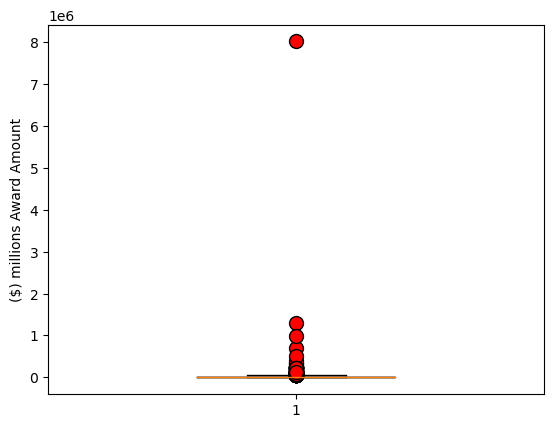

In [228]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel('($) millions Award Amount')
flierprops = dict(marker='o', markerfacecolor='r', markersize=10, markeredgecolor='black')
ax1.boxplot(big_df['($) millions Award Amount'], flierprops=flierprops, widths = 0.4, vert=True)
plt.savefig("../Project-1-repo/Fig0.png")
plt.show()

In [229]:
quartiles = (big_df["($) millions Award Amount"]).quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of award amount is: {lowerq}")
print(f"The upper quartile of award amount is: {upperq}")
print(f"The interquartile range of award amount is: {iqr}")
print(f"The the median of award amount is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#find zscore
z = np.abs(st.zscore(big_df["($) millions Award Amount"]))
print(f"z-score value {z}.")

print((big_df["($) millions Award Amount"]).skew())
(big_df["($) millions Award Amount"]).describe()

The lower quartile of award amount is: 85.0
The upper quartile of award amount is: 21513.12
The interquartile range of award amount is: 21428.12
The the median of award amount is: 353.8 
Values below -32057.18 could be outliers.
Values above 53655.3 could be outliers.
z-score value 0      0.127194
1      0.126027
2      0.127208
3      0.126701
4      0.127212
         ...   
736    0.127049
737    0.127049
738    0.036166
739    0.004389
740    0.326963
Name: ($) millions Award Amount, Length: 741, dtype: float64.
24.34995006327563


count    7.410000e+02
mean     3.875502e+04
std      3.047864e+05
min      1.520000e+00
25%      8.500000e+01
50%      3.538000e+02
75%      2.151312e+04
max      8.003500e+06
Name: ($) millions Award Amount, dtype: float64

In [230]:
#calculate the upper and lower limits & iqr to remove outliers 
Q1 = (big_df["($) millions Award Amount"]).quantile(0.25)
Q3 = (big_df["($) millions Award Amount"]).quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
#create arrays of values indicating the outlier rows
upper_array = np.where((big_df["($) millions Award Amount"])>=upper)[0]
lower_array = np.where((big_df["($) millions Award Amount"])<=lower)[0]
 
#remove outliers
big_df.drop(index=upper_array, inplace=True)
big_df.drop(index=lower_array, inplace=True)
 
#display the data table for preview
big_df.head()

,internal_id,City,State,Award ID,Recipient Name,Start Date,As Quarter,Fiscal Year,End Date,($) millions Award Amount,Description,Awarding Agency,Awarding Sub Agency,Contract Award Type,Funding Agency,Funding Sub Agency,COVID-19 Outlays,COVID-19 Obligations,awarding_agency_id,agency_slug
0,116287234,None,TX,SPE2DP20V1199,PACIFIC STAR CORPORATION,2020-09-16,2020Q4,2020,2020-10-14,14.34,8507655508!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
1,111967827,None,TX,SPE2DP20V1075,PACIFIC STAR CORPORATION,2020-08-20,2020Q4,2020,2020-09-17,369.50,"8507601396!APPLICATOR,SILVER N",Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
2,111302926,None,TX,SPE2DP20V0957,PACIFIC STAR CORPORATION,2020-07-24,2020Q4,2020,2020-08-21,9.90,8507548108!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
3,110741150,None,TX,SPE2DP20V0834,PACIFIC STAR CORPORATION,2020-06-29,2020Q3,2020,2020-07-27,164.40,8507500924!SALINE FOR OPHTHALM,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense
4,110123519,None,TX,SPE2DP20V0755,PACIFIC STAR CORPORATION,2020-06-10,2020Q3,2020,2020-07-08,8.65,8507451750!HYDROGEN PEROXIDE T,Department of Defense,Defense Logistics Agency,PURCHASE ORDER,Department of Defense,Defense Logistics Agency,None,None,1173,department-of-defense


In [231]:
#export the cleaned data table into a csv
#big_df.to_csv("FundingDataNoOutliers.csv")

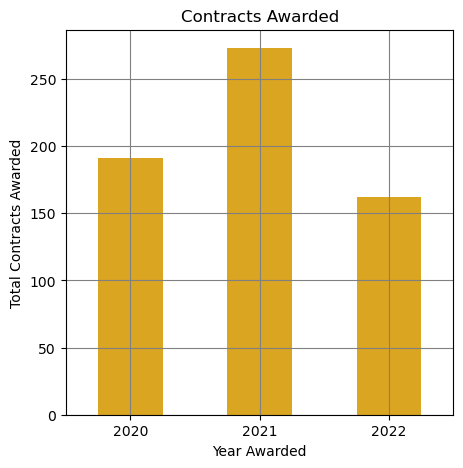

In [243]:
# Create a bar chart to capture total contacts awarded per fiscal year
plt.figure(figsize = (5,5))
big_df['Fiscal Year'].value_counts().sort_index().plot(kind='bar',rot=0, color = 'goldenrod')
# Add labels and title
plt.xlabel('Year Awarded')
plt.ylabel('Total Contracts Awarded')
plt.title('Contracts Awarded')
plt.grid(True, color = "grey")
plt.savefig("../Project-1-repo/Fig1.png")
plt.show()



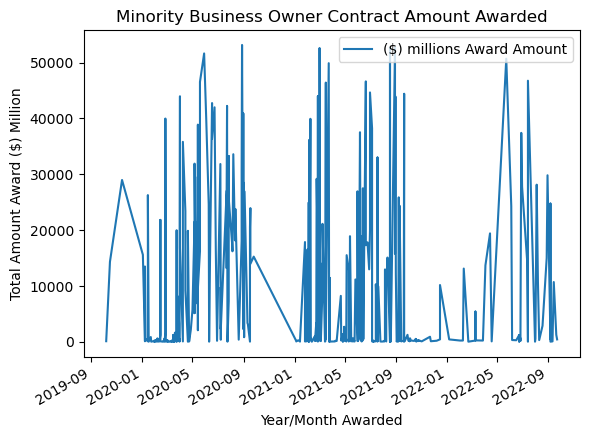

0         14.34
1        369.50
2          9.90
3        164.40
4          8.65
         ...   
735     1201.30
736       58.41
737       58.41
738    27739.67
739    37418.31
Name: ($) millions Award Amount, Length: 626, dtype: float64


In [233]:
# big_df["($) millions Award Amount"] = pd.to_numeric(big_df["($) millions Award Amount"])
ax = big_df.plot.line(x="Start Date", y= ("($) millions Award Amount"))
# Add labels and title
plt.xlabel('Year/Month Awarded')
plt.ylabel('Total Amount Award ($) Million')
plt.title('Minority Business Owner Contract Amount Awarded')
plt.savefig("../Project-1-repo/Fig2.png")
plt.show()
print(big_df['($) millions Award Amount'])

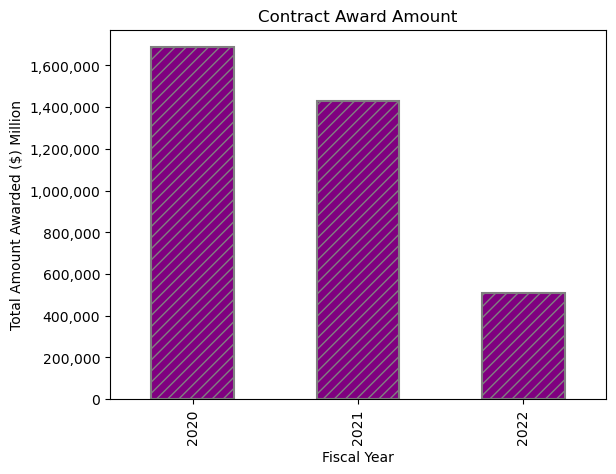

In [245]:
# Create a bar chart to capture total amount rewarded per fiscal year
sum_year = big_df.groupby('Fiscal Year')["($) millions Award Amount"].sum()
ax = sum_year.plot.bar(align = 'center', color='purple', edgecolor='gray', linewidth=1.5, hatch='///')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
total_sum = sum(big_df["($) millions Award Amount"])
# Add labels, title, and legend
plt.xlabel('Fiscal Year')
plt.ylabel('Total Amount Awarded ($) Million')
plt.title('Contract Award Amount')
plt.savefig("../Project-1-repo/Fig3.png")
plt.show()

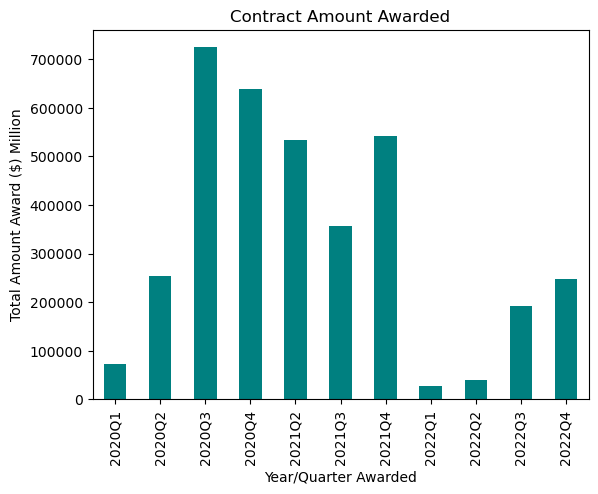

In [252]:
# Create a bar chart to capture total amount rewarded per quarter
sum_year = big_df.groupby('As Quarter')["($) millions Award Amount"].sum()
ax = sum_year.plot.bar(align = 'center', color = 'teal')
# Add labels and title
plt.xlabel('Year/Quarter Awarded')
plt.ylabel('Total Amount Award ($) Million')
plt.title('Contract Amount Awarded')
plt.savefig("../Project-1-repo/Fig4.png")
plt.show()


,($) millions Award Amount
Awarding Agency,
Department of Defense,595200.75
Department of Health and Human Services,694683.19
Department of Veterans Affairs,2336287.59


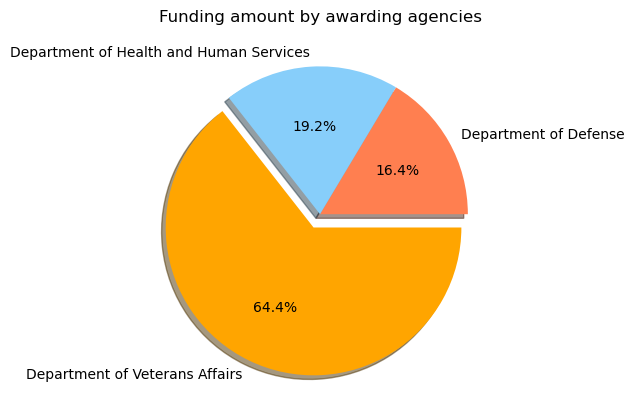

In [236]:
# Create a pie chart to capture total percentage by awarding agency
labels = big_df['Awarding Agency']
sizes = big_df.groupby(labels)["($) millions Award Amount"].sum()
# inner_labels = [595200,694683,2336287]
colors = ['coral','lightskyblue', 'orange']
# Add labels, title, and legend
plt.pie(sizes.values ,labels= labels.unique() ,colors=colors,autopct="%1.1f%%", explode= (0,0,0.1), shadow = True)
plt.title('Funding amount by awarding agencies')
plt.savefig("../Project-1-repo/Fig5.png")
plt.show
pd.DataFrame(sizes)

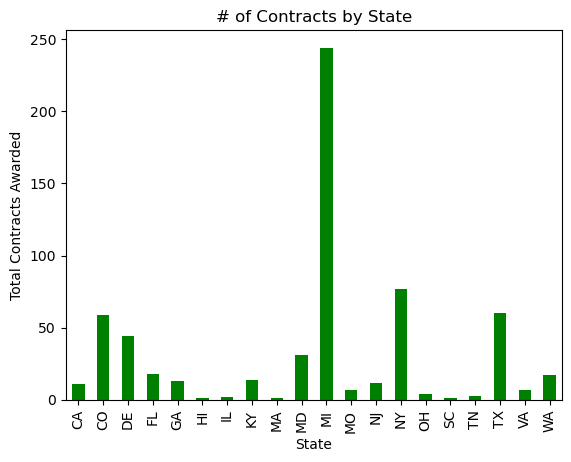

In [237]:
# Create a bar chart to capture total contracts rewarded per state
amount = big_df.groupby('State')["($) millions Award Amount"].count()
ax = amount.plot.bar(align = 'center', color = 'green')
# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Contracts Awarded')
plt.title('# of Contracts by State')
plt.savefig("../Project-1-repo/Fig6.png")
plt.show()

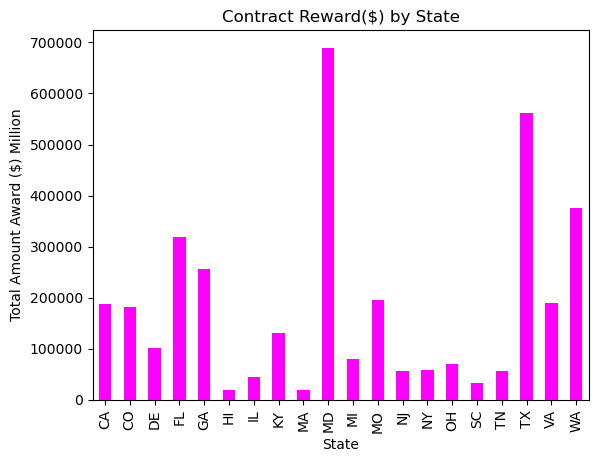

In [238]:
# Create a bar chart to capture total amount rewarded per state
amount = big_df.groupby('State')["($) millions Award Amount"].sum()
ax = amount.plot.bar(align = 'center', color = 'magenta')
# Add labels and title
plt.xlabel('State')
plt.ylabel('Total Amount Award ($) Million')
plt.title('Contract Reward($) by State')
plt.savefig("../Project-1-repo/Fig7.png")
plt.show()

In [239]:
# Summary stats
agg_cleaned_df = big_df.groupby('Fiscal Year').agg({'($) millions Award Amount':['mean','median','var','std','sem']})
agg_cleaned_df

($) millions Award Amount                                     \
                                 mean median           var           std   
Fiscal Year                                                                
2020                      8832.114450  280.0  1.838648e+08  13559.673997   
2021                      5241.843846  206.8  1.321700e+08  11496.521320   
2022                      3137.125309  240.0  7.482046e+07   8649.882298   

                         
                    sem  
Fiscal Year              
2020         981.143576  
2021         695.801123  
2022         679.598937

In [240]:
# P-test
Award_amount =big_df ["($) millions Award Amount"]
Award_period=big_df["Fiscal Year"]
st.ttest_ind(Award_amount, Award_period, equal_var=False)

Ttest_indResult(statistic=8.048422386981931, pvalue=4.236811439575075e-15)